In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import missingno as msno

## Dados de Portifolio, trata-se de um determinado nicho de soluções.

In [4]:
df = pd.read_csv('portfolio3a.csv', index_col=0)
df.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...,True,MUNICIPIO,MA,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,21.813699,> 20,False,...,144.663535,259.166667,40.500000,745.0,745.0,745.0,0.000000,0.000000,0.00,2
1,16843c9ffb920170477118933798510d8d5f00f5c56c12...,True,SOCIEDADE SIMPLES LIMITADA,PI,ENTIDADES EMPRESARIAIS,SERVICOS DE EDUCACAO,SERVIÇO,16.389041,15 a 20,False,...,65.942017,149.033333,4.866667,119.0,104.0,113.0,14.423077,5.309735,6.25,0
2,1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185...,True,ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU D...,AM,ADMINISTRACAO PUBLICA,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,40.380822,> 20,False,...,284.854706,557.866667,24.200000,170.0,170.0,177.0,0.000000,-3.954802,0.00,0
3,3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...,True,MUNICIPIO,PI,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,43.854795,> 20,False,...,189.020309,506.966667,31.333333,151.0,151.0,151.0,0.000000,0.000000,0.00,0
4,c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...,True,MUNICIPIO,RN,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,43.865753,> 20,False,...,238.418341,556.833333,34.033333,229.0,229.0,418.0,0.000000,-45.215311,0.00,1


In [5]:
df.shape

(265, 181)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 264
Columns: 181 entries, id to qt_filiais
dtypes: bool(14), float64(144), int64(1), object(22)
memory usage: 351.4+ KB


# Avaliação de dados faltantes

### Percebe-se que este portifolio possui um elevado número de dados faltantes.

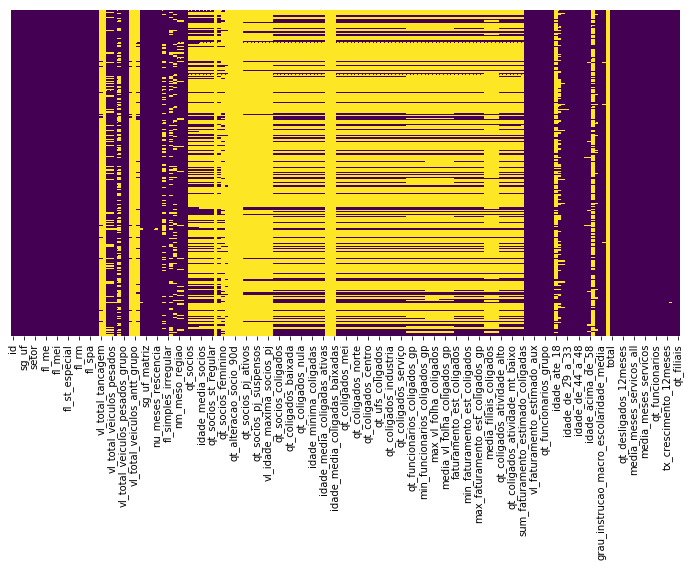

In [7]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

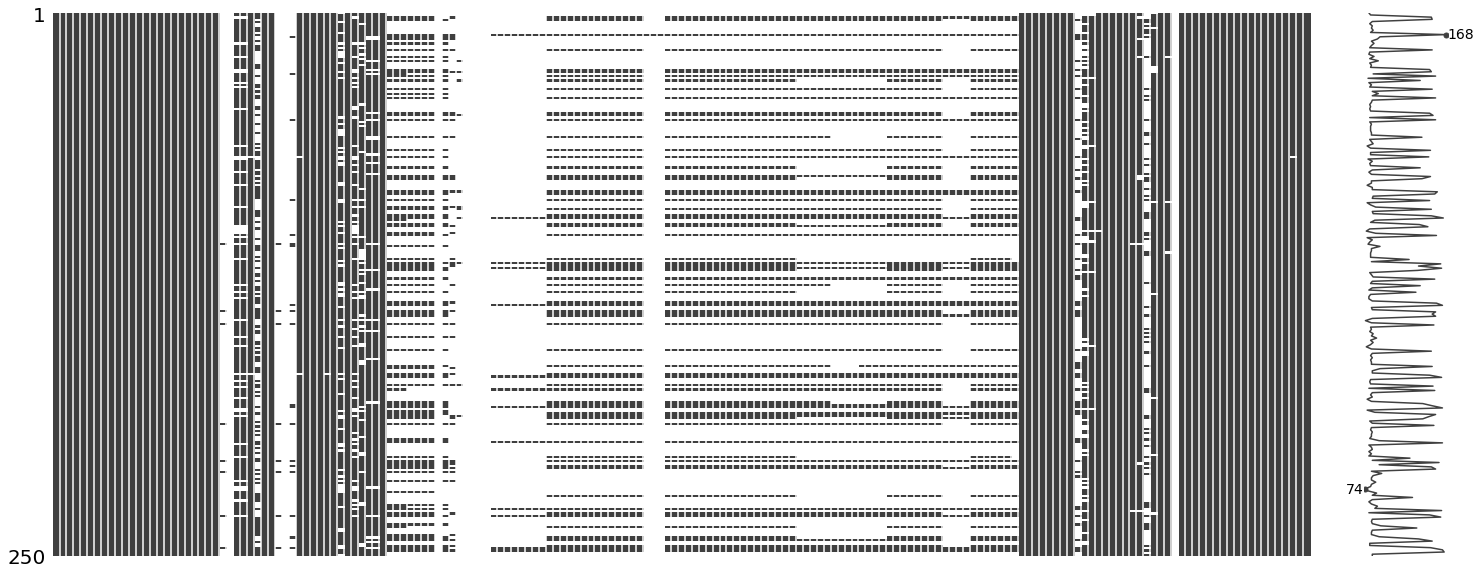

In [8]:
msno.matrix(df.sample(250))

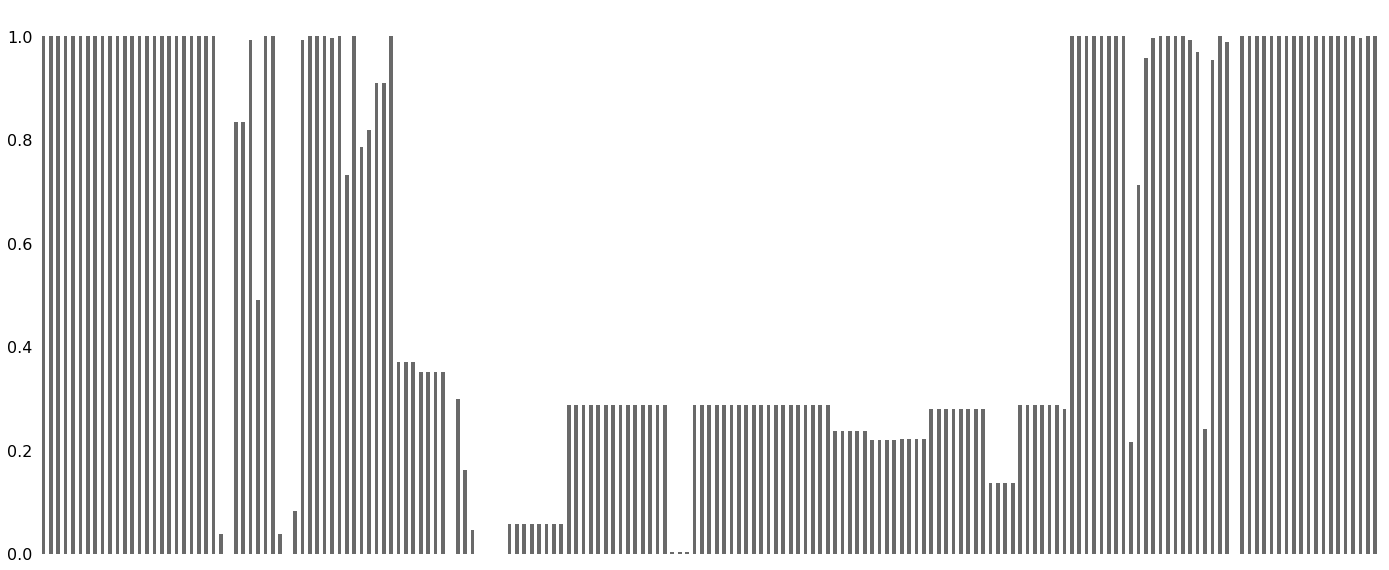

In [9]:
msno.bar(df)

In [10]:
# checkin what is numerical features
num_feat = df.select_dtypes(include=[np.number])
num_feat.columns

Index(['idade_empresa_anos', 'vl_total_tancagem', 'vl_total_veiculos_antt',
       'vl_total_veiculos_leves', 'vl_total_veiculos_pesados', 'qt_art',
       'vl_total_veiculos_pesados_grupo', 'vl_total_veiculos_leves_grupo',
       'vl_total_tancagem_grupo', 'vl_total_veiculos_antt_grupo',
       ...
       'media_meses_servicos', 'max_meses_servicos', 'min_meses_servicos',
       'qt_funcionarios', 'qt_funcionarios_12meses', 'qt_funcionarios_24meses',
       'tx_crescimento_12meses', 'tx_crescimento_24meses', 'tx_rotatividade',
       'qt_filiais'],
      dtype='object', length=145)

In [11]:
# checkin what is categorical features
cat_feat = df.select_dtypes(include=[np.object])
cat_feat.columns

Index(['id', 'de_natureza_juridica', 'sg_uf', 'natureza_juridica_macro',
       'de_ramo', 'setor', 'idade_emp_cat', 'dt_situacao', 'fl_rm',
       'nm_divisao', 'nm_segmento', 'fl_optante_simples', 'fl_optante_simei',
       'sg_uf_matriz', 'de_saude_tributaria', 'de_saude_rescencia',
       'de_nivel_atividade', 'de_indicador_telefone', 'nm_meso_regiao',
       'nm_micro_regiao', 'de_faixa_faturamento_estimado',
       'de_faixa_faturamento_estimado_grupo'],
      dtype='object')

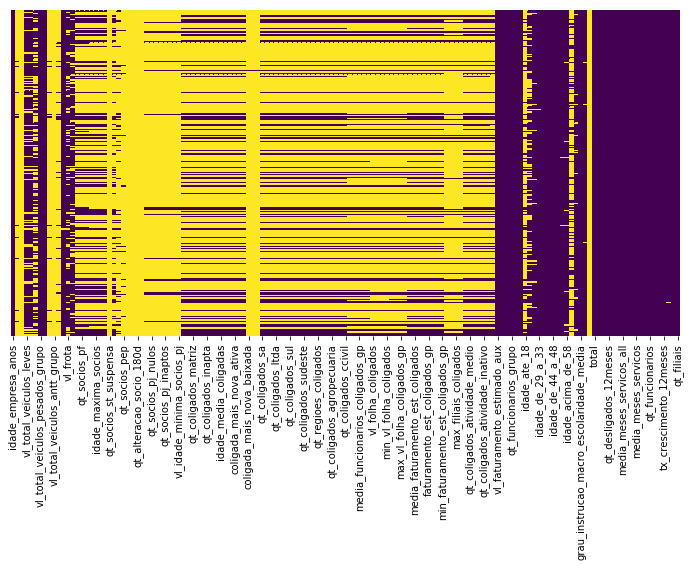

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(num_feat.isnull(),yticklabels=False,cbar=False,cmap='viridis')

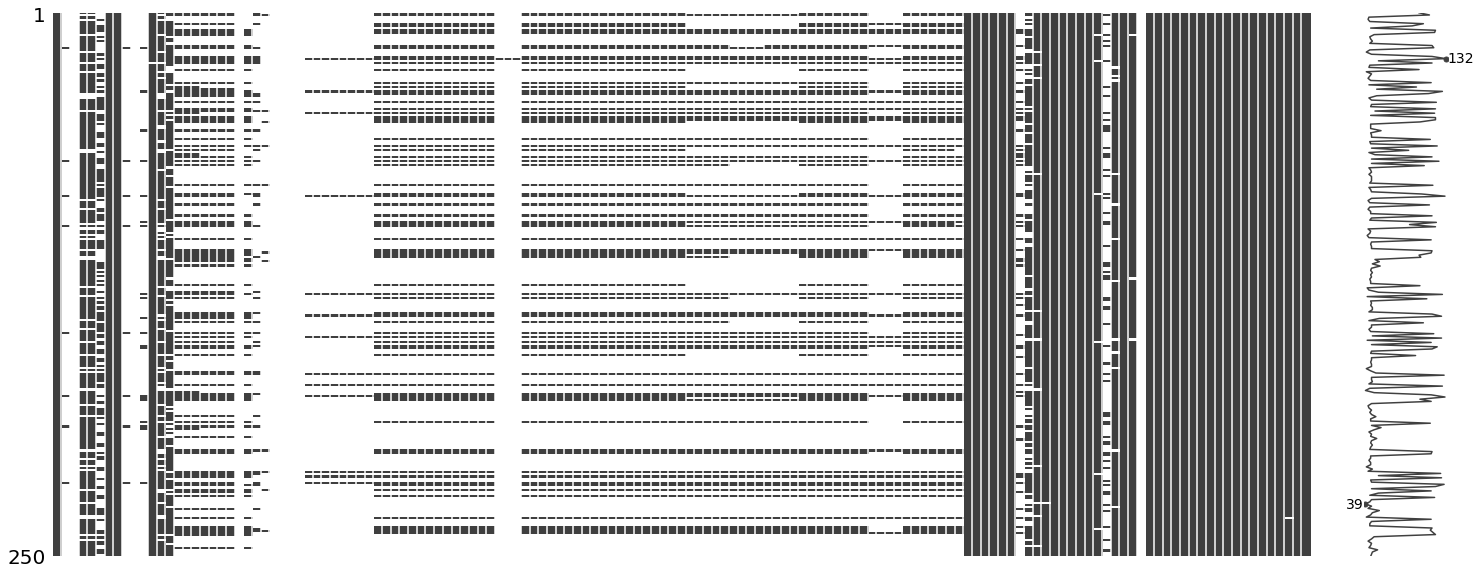

In [13]:
msno.matrix(num_feat.sample(250))

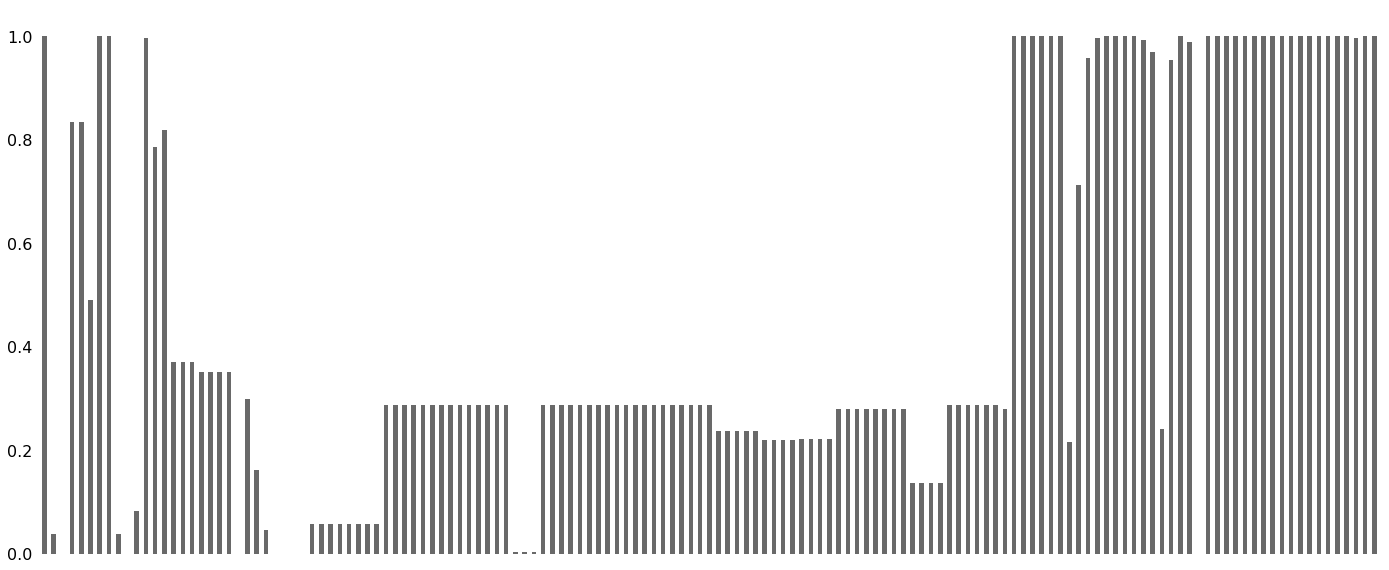

In [14]:
msno.bar(num_feat)

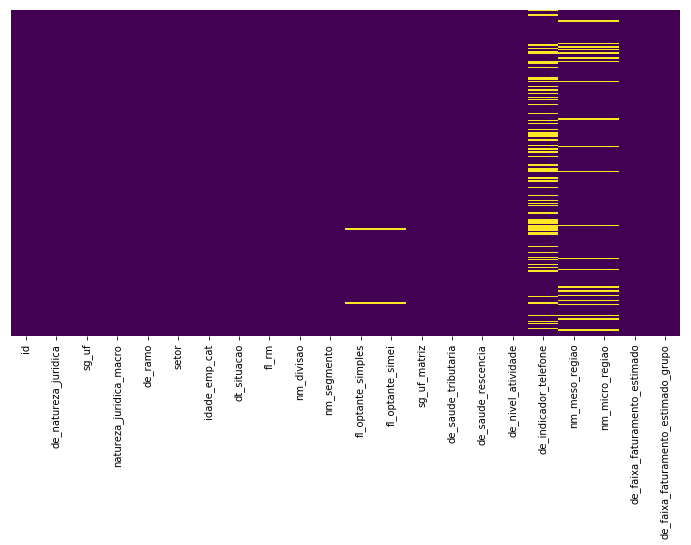

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(cat_feat.isnull(),yticklabels=False,cbar=False,cmap='viridis')

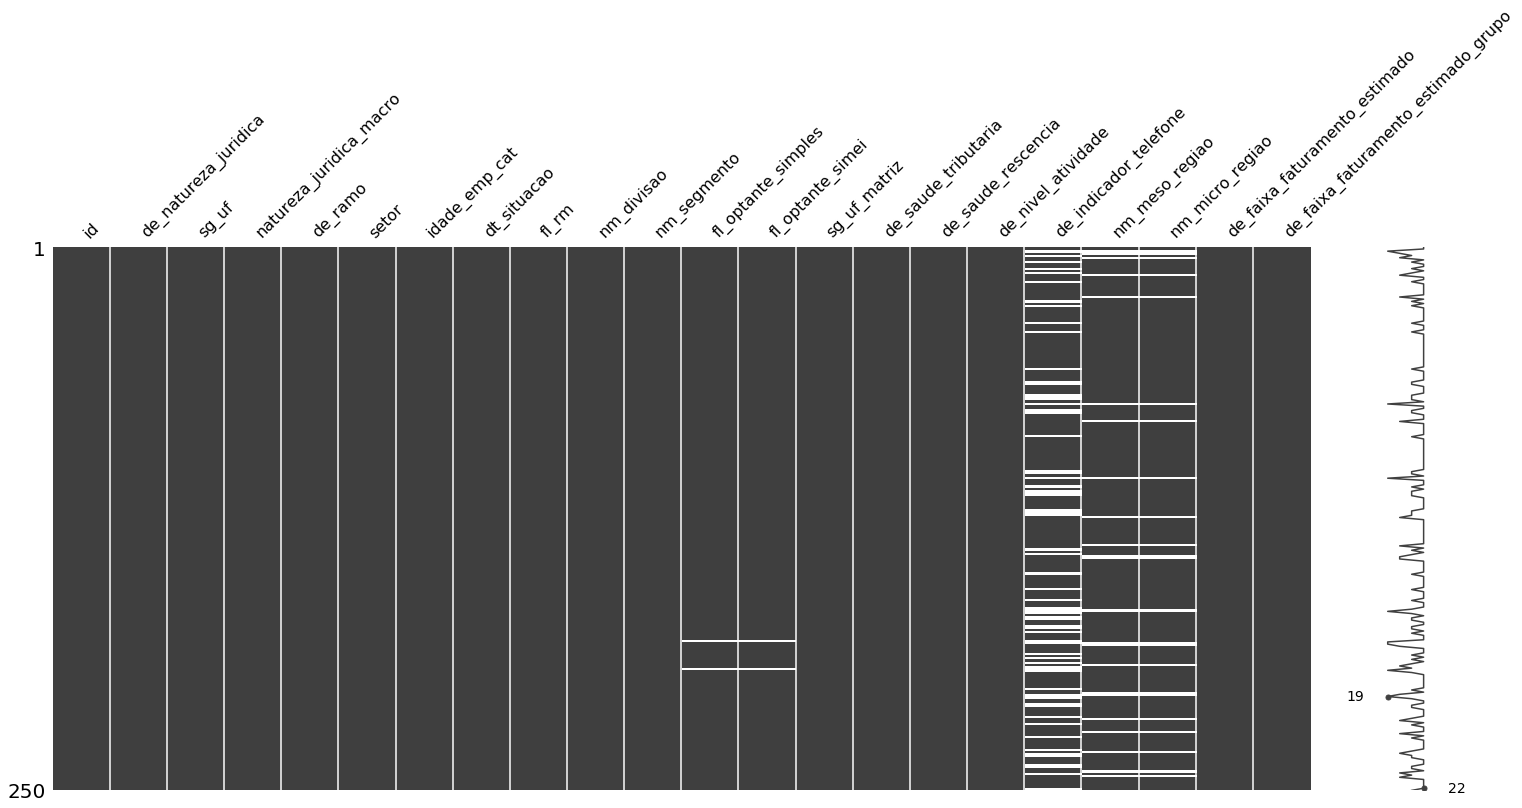

In [16]:
msno.matrix(cat_feat.sample(250))

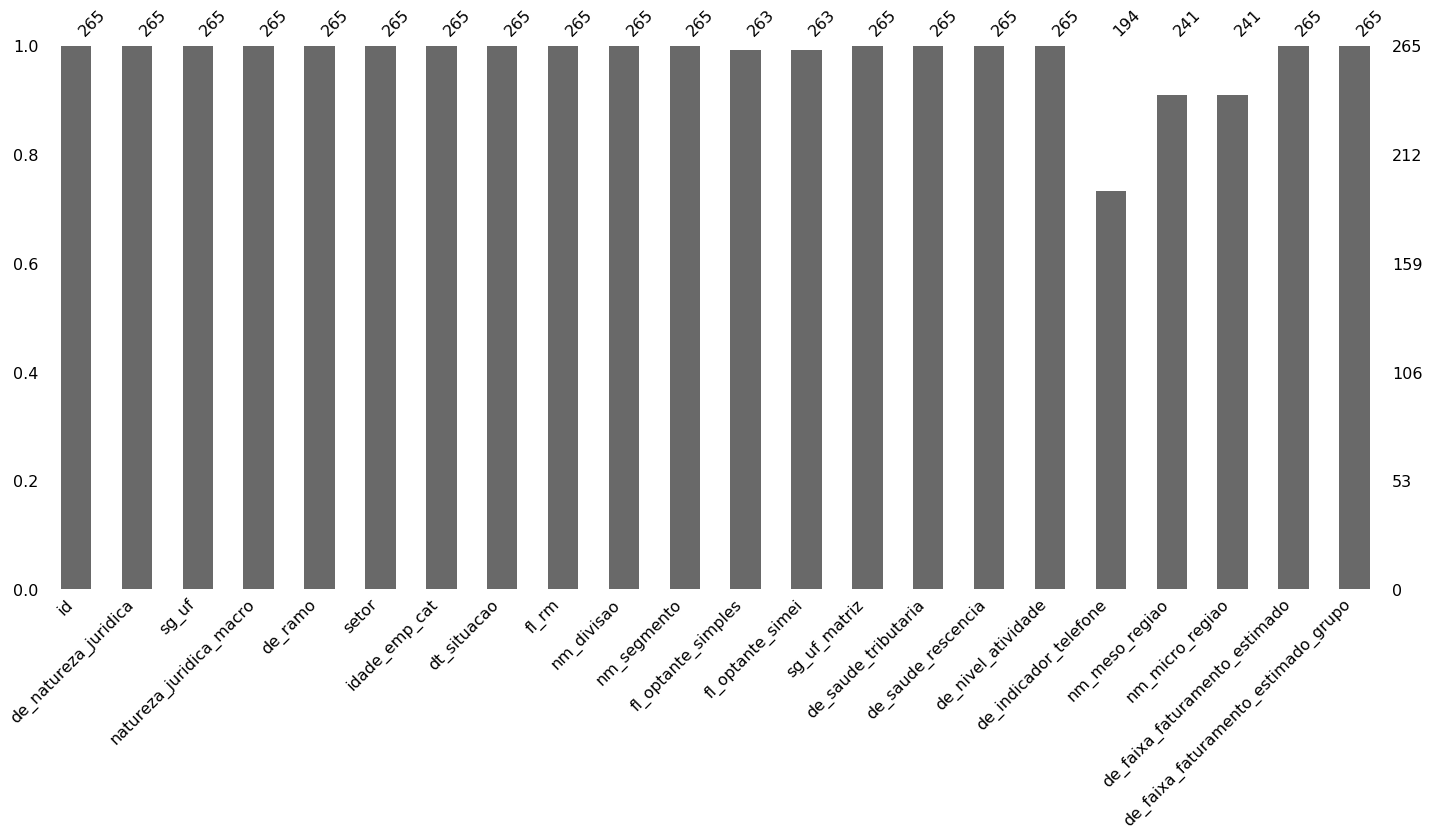

In [17]:
msno.bar(cat_feat)

# Avaliação de contexto

In [18]:
df.de_ramo.unique()

array(['ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL',
       'SERVICOS DE EDUCACAO', 'SERVICOS DE ALOJAMENTO/ALIMENTACAO',
       'SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS',
       'SERVICOS ADMINISTRATIVOS', 'SERVICOS DIVERSOS',
       'SERVICOS SOCIAIS', 'SERVICOS DE SAUDE',
       'TRANSPORTE, ARMAZENAGEM E CORREIO',
       'SEGUROS, PLANOS DE PREVIDENCIA E PLANOS DE SAUDE',
       'SERVICOS DE SANEAMENTO BASICO', 'CULTURA, ESPORTE E RECREACAO',
       'TELECOM', 'SERVICOS FINANCEIROS', 'ATIVIDADES IMOBILIARIAS',
       'INDUSTRIA DIGITAL'], dtype=object)

In [19]:
df.setor.unique()

array(['SERVIÇO'], dtype=object)

In [20]:
setores = pd.DataFrame(df.groupby('setor').id.count())
setores

,id
setor,
SERVIÇO,265


In [21]:
#sns.bar(setores)

In [22]:
df.groupby(['setor','de_natureza_juridica']).id.count().to_frame()

id
setor   de_natureza_juridica                                   
SERVIÇO ASSOCIACAO PRIVADA                                    8
        AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL             6
        AUTARQUIA FEDERAL                                     4
        AUTARQUIA MUNICIPAL                                   1
        CONDOMINIO EDILICIO                                   1
        CONSORCIO DE SOCIEDADES                               1
        COOPERATIVA                                           4
        EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA...   13
        EMPRESARIO INDIVIDUAL                                 3
        ENTIDADE SINDICAL                                     1
        FUNDACAO PRIVADA                                      2
        FUNDACAO PUB DE DIREITO PUB EST OU DO DF              3
        FUNDACAO PUBLICA DE DIREITO PUB MUNICIPAL             1
        FUNDO PUBLICO                                         1
        MUNICIPIO                                           108
        ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU DO...   20
        ORGAO PUBLICO DO PODER EXECUTIVO MUNICIPAL            9
        ORGAO PUBLICO DO PODER JUDICIARIO ESTADUAL            1
        ORGAO PUBLICO DO PODER JUDICIARIO FEDERAL             2
        ORGAO PUBLICO DO PODER LEGISLATIVO ESTADUAL OU ...    3
        SERVICO SOCIAL AUTONOMO                               5
        SOCIEDADE ANONIMA FECHADA                             2
        SOCIEDADE DE ECONOMIA MISTA                           2
        SOCIEDADE EMPRESARIA LIMITADA                        62
        SOCIEDADE SIMPLES LIMITADA                            2

In [23]:
df.idade_emp_cat.unique()

array(['> 20', '15 a 20', '5 a 10', '10 a 15', '1 a 5', '<= 1'],
      dtype=object)

In [24]:
df.idade_empresa_anos.head(10)

0    21.813699
1    16.389041
2    40.380822
3    43.854795
4    43.865753
5    47.087671
6    15.734247
7    26.520548
8     8.446575
9    11.035616
Name: idade_empresa_anos, dtype: float64

In [25]:
df.idade_empresa_anos.mean()

27.762501938485386

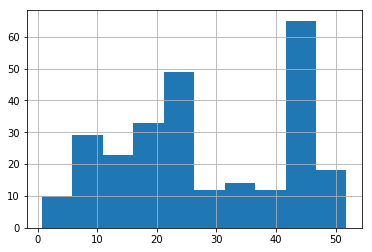

In [26]:
df.idade_empresa_anos.hist()

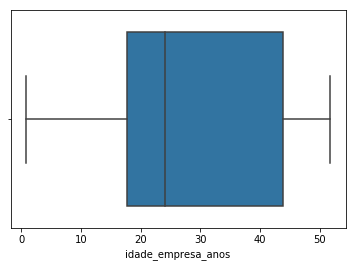

In [27]:
sns.boxplot(df.idade_empresa_anos)

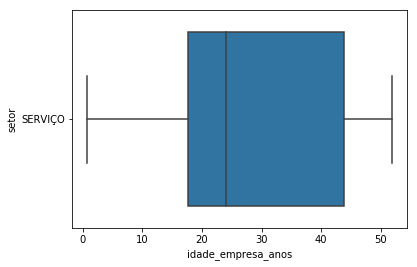

In [28]:
sns.boxplot(x='idade_empresa_anos', y='setor', data=df)

In [29]:
df.head()

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe2...,True,MUNICIPIO,MA,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,21.813699,> 20,False,...,144.663535,259.166667,40.500000,745.0,745.0,745.0,0.000000,0.000000,0.00,2
1,16843c9ffb920170477118933798510d8d5f00f5c56c12...,True,SOCIEDADE SIMPLES LIMITADA,PI,ENTIDADES EMPRESARIAIS,SERVICOS DE EDUCACAO,SERVIÇO,16.389041,15 a 20,False,...,65.942017,149.033333,4.866667,119.0,104.0,113.0,14.423077,5.309735,6.25,0
2,1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185...,True,ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU D...,AM,ADMINISTRACAO PUBLICA,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,40.380822,> 20,False,...,284.854706,557.866667,24.200000,170.0,170.0,177.0,0.000000,-3.954802,0.00,0
3,3aafa3a1f12f483740a52956af100223333d0e3c79bf2c...,True,MUNICIPIO,PI,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,43.854795,> 20,False,...,189.020309,506.966667,31.333333,151.0,151.0,151.0,0.000000,0.000000,0.00,0
4,c60431fbca90067f105570e1e8a684bcd7048205bbf6c4...,True,MUNICIPIO,RN,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,43.865753,> 20,False,...,238.418341,556.833333,34.033333,229.0,229.0,418.0,0.000000,-45.215311,0.00,1
